In [37]:
#importation des bibliotheques

import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [38]:
#importation des donnees
df = pd.read_csv("module2/Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [40]:
#resume statistique
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


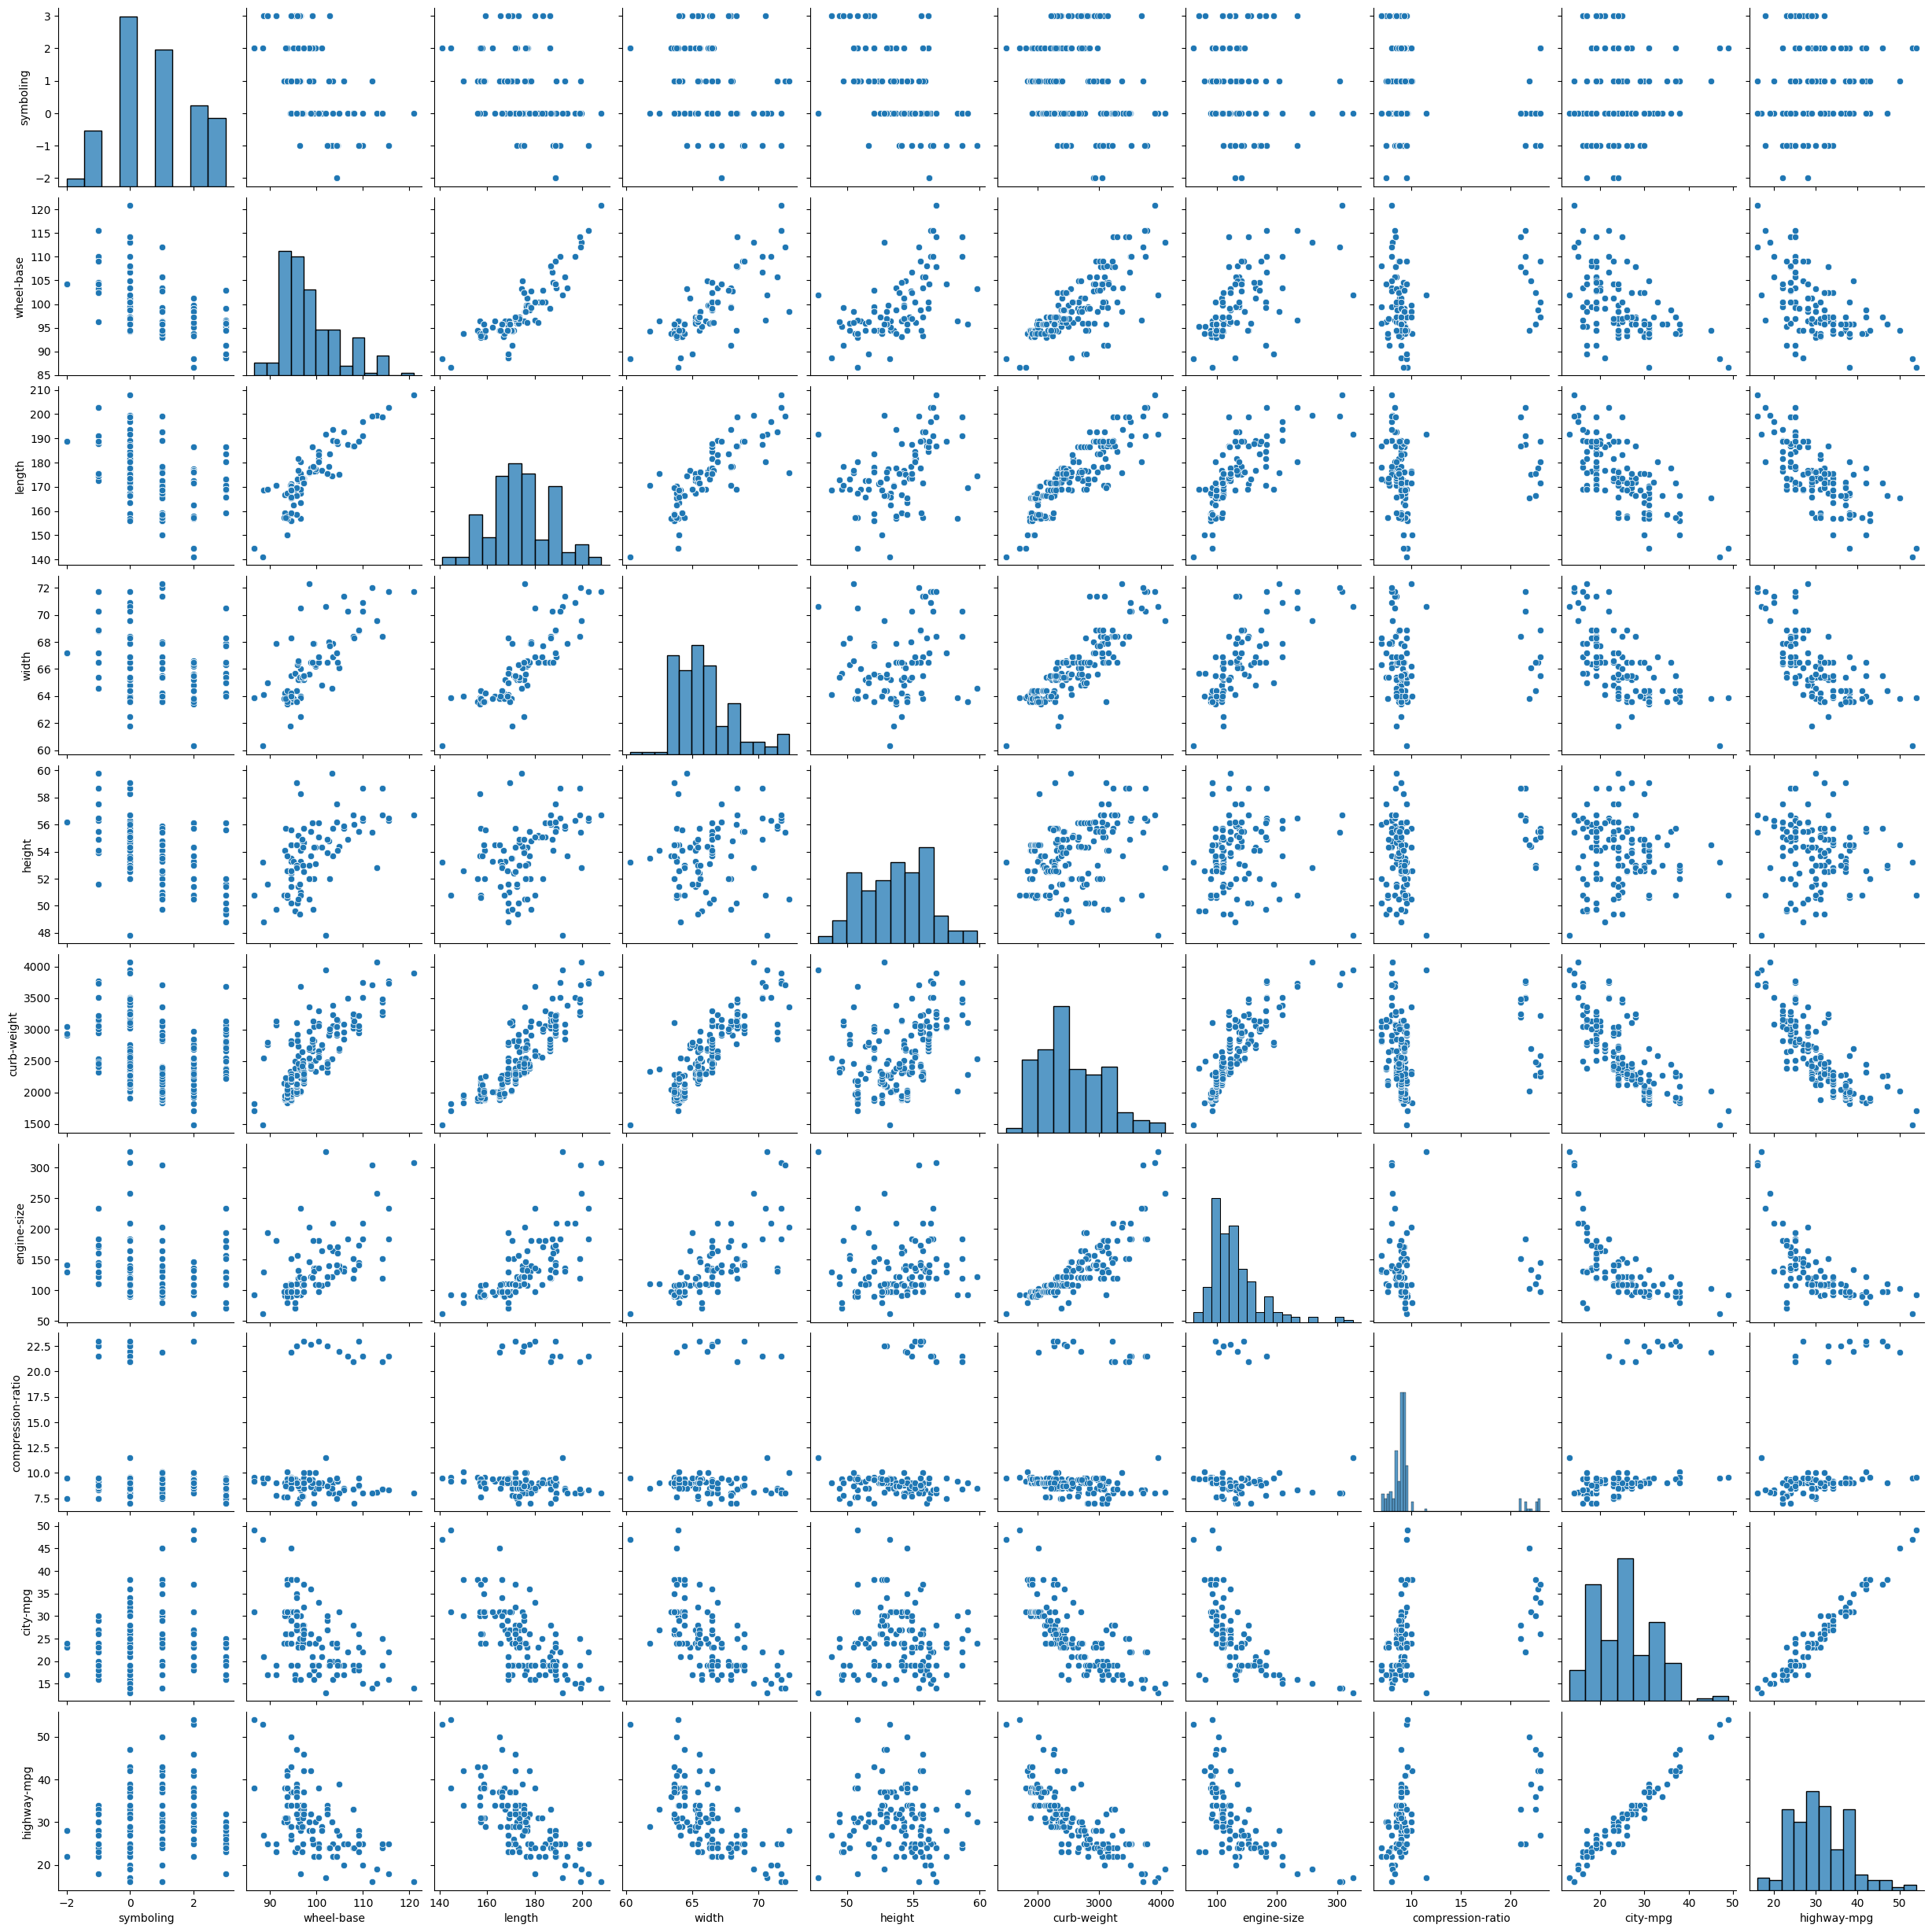

In [41]:
sns.pairplot(df)

In [42]:
# 2. Remplacer les caractères non numériques (ex : "?") par NaN
df["price"] = df["price"].replace("?", pd.NA)

# 3. Convertir en numérique (int ou float)
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# 4. (Optionnel) Remplacer ou supprimer les lignes avec valeurs manquantes
df["price"] = df["price"].fillna(df["price"].median())  # ou .dropna()

# Résultat : la colonne est maintenant en float
print(df["price"].dtype)  # float64 ou int64

float64


In [43]:
df["bore"] = pd.to_numeric(df["bore"].replace("?", pd.NA), errors="coerce")
df["bore"] = df["bore"].fillna(df["bore"].astype(float).median())


In [44]:
df["stroke"] = pd.to_numeric(df["stroke"].replace("?", pd.NA), errors="coerce")
df["stroke"] = df["stroke"].fillna(df["stroke"].astype(float).median())


In [45]:
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"].replace("?", pd.NA), errors="coerce")
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].astype(float).median())

In [46]:
df["horsepower"] = pd.to_numeric(df["horsepower"].replace("?", pd.NA), errors="coerce")
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].astype(float).median())

In [47]:
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"].replace("?", pd.NA), errors="coerce")
df["peak-rpm"] = df["peak-rpm"].fillna(df["peak-rpm"].astype(float).median())

In [48]:
df_num = df.select_dtypes(exclude="object")
df_num.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [49]:
df_num.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [50]:
#feature
X = df_num.drop("price", axis=1)


#target
y = df["price"]

#train, test et split
seed = 123
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=seed
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(164, 15) (164,) (41, 15) (41,)


In [51]:
#modelele
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
def evaluate_model(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    
    print(f"RMSE train : {rmse_train:.2f}")
    print(f"RMSE test  : {rmse_test:.2f}")

In [53]:
evaluate_model(lr)

RMSE train : 3682.19
RMSE test  : 2221.10


In [54]:
#random forest
rf = RandomForestRegressor(random_state=seed)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [55]:
evaluate_model(rf)

RMSE train : 1332.48
RMSE test  : 1431.25


In [56]:
import joblib #permet d'enregistrer le modele
joblib.dump(rf, 'final_model.joblib')

['final_model.joblib']